In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from itertools import product

pd.set_option('display.max_rows', 15)
np.random.seed(5)


np.random.seed(5)

sns.set()


In [2]:
import matplotlib.pyplot as plt
import keras
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf


In [3]:
from google.colab import drive
drive.mount('/content/drive')
batter = pd.read_csv('/content/drive/MyDrive/Diss/Code/CSV/batter_for_clustering.csv')

Mounted at /content/drive


In [4]:
batter_for_clustering = batter.copy().drop(['name','country','prelim_metric','pre-rank'],axis=1)
batter_for_clustering

,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index
0,32.48,139.55,0.189,3.829,0.128,10.350,0.291
1,32.66,136.71,0.187,4.185,0.065,10.750,0.222
2,51.50,137.67,0.163,4.382,0.281,17.438,0.337
3,29.84,134.69,0.201,4.109,0.079,9.149,0.218
4,34.69,144.87,0.204,4.337,0.112,10.910,0.225
...,...,...,...,...,...,...,...
1297,3.00,48.00,0.080,0.500,0.000,1.000,0.000
1298,2.75,29.72,0.054,0.500,0.000,0.750,0.000
1299,2.75,27.50,0.025,0.250,0.000,1.750,0.000
1300,2.25,32.14,0.000,0.000,0.000,2.250,0.000


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
batter_for_clustering_scaled= scaler.fit_transform(batter_for_clustering)

In [6]:
batter_for_clustering_scaled

array([[ 1.30610588,  1.07729054,  1.1284799 , ..., -0.43954647,
         0.98167219,  2.49798607],
       [ 1.32361762,  0.97677539,  1.09370896, ..., -0.77585764,
         1.09657193,  1.76910627],
       [ 3.15651345,  1.01075234,  0.67645768, ...,  0.37720923,
         3.0176955 ,  2.98390594],
       ...,
       [-1.58625044, -2.88845682, -1.72273715, ..., -1.12284536,
        -1.48867213, -0.57598526],
       [-1.63489417, -2.72423488, -2.1573739 , ..., -1.12284536,
        -1.34504746, -0.57598526],
       [-1.65921604, -2.88562541, -2.1573739 , ..., -1.12284536,
        -1.41685979, -0.57598526]])

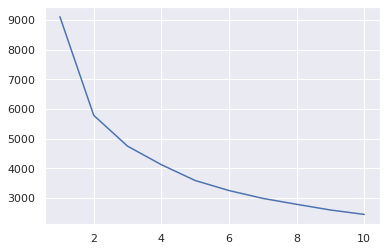

In [7]:
wcss = []
for i in range(1,11,1):
  model = KMeans(i).fit(batter_for_clustering_scaled)
  wcss.append(model.inertia_)
plt.plot(np.arange(1,11,1),wcss)
plt.show()

In [8]:
kmodel =  KMeans(n_clusters=4)
ypred_kmeans = kmodel.fit_predict(batter_for_clustering_scaled)

In [9]:
ypred_kmeans

array([3, 3, 3, ..., 1, 1, 1], dtype=int32)

In [10]:
results = batter
results['kmeans'] = ypred_kmeans

In [11]:
X_train, X_test, y_train, y_test = train_test_split(results.drop('kmeans',axis=1), results['kmeans'], test_size=0.2, random_state=42)
X_train.drop(['name','country','prelim_metric','pre-rank'],axis=1,inplace=True)
X_test.drop(['name','country','prelim_metric','pre-rank'],axis=1,inplace=True)

In [12]:
X_train = scaler.fit_transform(X_train)

In [13]:
X_train

array([[ 0.61339549,  0.51724582,  0.57358962, ..., -0.72929457,
         1.15821178,  1.94904961],
       [-0.05356871,  0.4787138 ,  0.21819007, ..., -0.51200904,
         0.38774484,  0.70738943],
       [-1.15868456,  0.33466888, -0.03058963, ..., -0.54910657,
        -0.98049818, -0.58921147],
       ...,
       [-1.52381094, -2.48717123, -2.19852693, ..., -0.07743798,
        -1.1988164 , -0.58921147],
       [-0.85489941,  0.00516611, -0.10166954, ...,  1.33756781,
        -1.25657254, -0.58921147],
       [-0.89092521,  1.40708335,  1.08891898, ..., -0.07743798,
        -1.1988164 , -0.58921147]])

In [14]:
model = Sequential()
model.add(Dense(12, input_shape=(7,), activation='relu'))
model.add(Dense(6, input_shape=(7,), activation='relu'))
model.add(Dense(6, input_shape=(7,), activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='softmax'))

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [16]:
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
105/105 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3468
Epoch 2/150
105/105 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.3468
Epoch 3/150
105/105 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3468
Epoch 4/150
105/105 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3468
Epoch 5/150
105/105 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3468
Epoch 6/150
105/105 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3468
Epoch 7/150
105/105 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3468
Epoch 8/150
105/105 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3468
Epoch 9/150
105/105 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3468
Epoch 10/150
105/105 [==============================] -

In [17]:
accuracy = model.evaluate(X_train, y_train, verbose=0)

In [18]:
accuracy

[0.0, 0.3467819392681122]